In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster  import KMeans
from sklearn.metrics import silhouette_score

In [ ]:
data=pd.read_csv('environmental_socioeconomic.csv')
data

,co2_emissions,waste_production,gdp,population
0,218.543053,436.276737,39199.932440,6.417631e+07
1,477.821438,399.620887,17380.479824,4.646995e+07
2,379.397274,258.538521,23865.587775,9.648535e+07
3,319.396318,646.540003,36531.225474,2.267887e+07
4,120.208388,528.961744,29283.573781,5.919779e+07
...,...,...,...,...
9995,435.945195,889.334766,48091.018014,7.564936e+07
9996,453.878976,142.132562,39912.968447,7.668817e+07
9997,476.018562,373.328622,10778.234513,2.768737e+07
9998,228.869597,498.988006,26040.193699,4.399766e+07


In [ ]:
data.shape

(10000, 4)

In [ ]:
data.isnull().sum()

,0
co2_emissions,0
waste_production,0
gdp,0
population,0


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data_scaled=scaler.fit_transform(data)
print(pd.DataFrame(data_scaled,columns=data.columns).head())

   co2_emissions  waste_production       gdp  population
0      -0.415900         -0.452465  0.801884    0.482494
1       1.587377         -0.593258 -1.100359   -0.136414
2       0.826917         -1.135149 -0.534981    1.611824
3       0.363328          0.355146  0.569224   -0.968007
4      -1.175669         -0.096466 -0.062635    0.308475


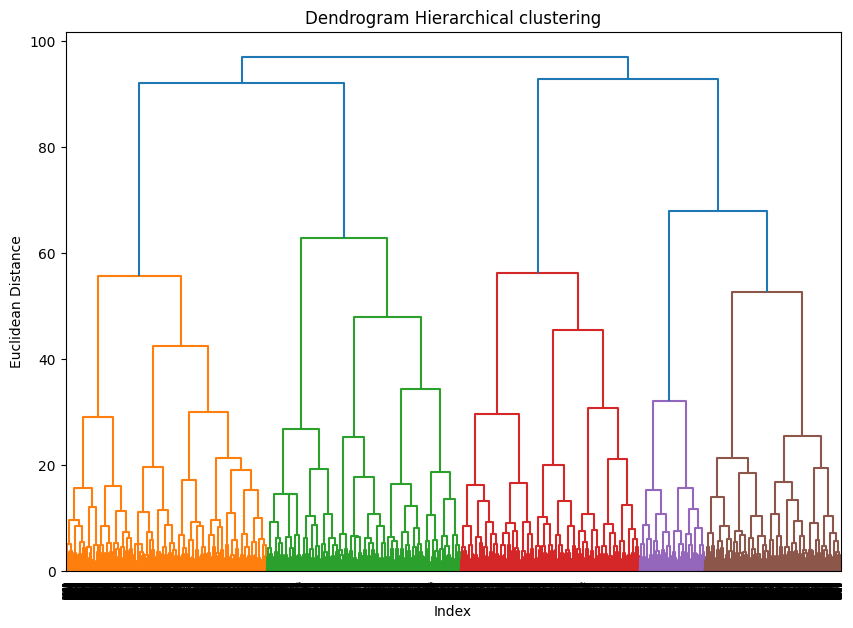

In [ ]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering


In [70]:
hierarchial_clustering = AgglomerativeClustering(n_clusters=4, linkage='ward')
data['cluster'] = hierarchial_clustering.fit_predict(data_scaled)

In [71]:
print(data.head())

   co2_emissions  waste_production           gdp    population  cluster
0     218.543053        436.276737  39199.932440  6.417631e+07        3
1     477.821438        399.620887  17380.479824  4.646995e+07        2
2     379.397274        258.538521  23865.587775  9.648535e+07        2
3     319.396318        646.540003  36531.225474  2.267887e+07        1
4     120.208388        528.961744  29283.573781  5.919779e+07        1


In [72]:
from sklearn.metrics import silhouette_score
sil_score = silhouette_score(data_scaled, data['cluster'])
print(f'Silhouette Score: {sil_score}')

Silhouette Score: 0.13124908918954956


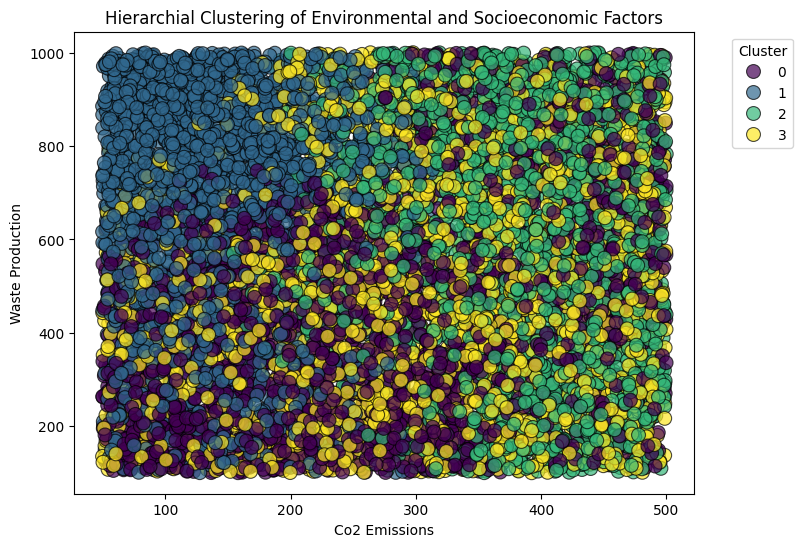

In [73]:
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(x='co2_emissions', y='waste_production', hue='cluster', data=data, palette='viridis', s=100, alpha=0.7, edgecolor='k')
plt.title("Hierarchial Clustering of Environmental and Socioeconomic Factors")
plt.xlabel('Co2 Emissions')
plt.ylabel('Waste Production')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data.drop('cluster', axis=1)
y = data['cluster']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_model = LogisticRegression(random_state=42)
dt_model.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [75]:
y_pred_lr = dt_model.predict(X_test)

In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lr)

0.526